In [3]:
# Imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams

In [4]:
stop_words = None
with open("../data/ro_stop_words.txt", "r", encoding="utf-8") as fp:
    stop_words = set(fp.read().split())

In [5]:
df = pd.read_csv("../data/ro_news.csv")
df.head()

,source,title,text,url
0,evz.ro,Ministrul spulberă informațiile despre pensii....,Ministrul Muncii Violeta Alexandru a declarat ...,https://evz.ro/bomba-despre-pensii-ministrul-s...
1,adevarul.ro,G4Media: Klaus Iohannis i-a cerut premierului ...,"Preşedintele Klaus Iohannis i-a cerut, vineri,...",https://adevarul.ro/news/politica/g4media-klau...
2,puterea.ro,ULTIMA ORĂ: Medicul Mircea Beuran a fost REȚIN...,Medicul Mircea Beuran a fost reținut pentru 24...,https://www.puterea.ro/eveniment/ultima-ora-me...
3,agerpres.ro,"Iohannis, în Israel: România - angajată să con...","\r\nTrimisul special al AGERPRES, Florentina P...",https://www.agerpres.ro/politica/2020/01/21/io...
4,news.ro,Avertizări cod galben şi cod portocaliu de plo...,Meteorologii au emis saâmbătă seară avertizări...,https://www.news.ro/social/avertizari-cod-galb...


In [6]:
def clean(txt):
    tokens = word_tokenize(txt)
    tokens = [t for t in tokens if t not in stop_words]
    words = [word.lower() for word in tokens if word.isalpha()]
    return words

In [7]:
%%time
df['title_clean'] = df['title'].apply(clean)
df['text_clean'] = df['text'].apply(clean)

Wall time: 49.6 s


In [8]:
flatten_list = []
for sublist in df["text_clean"].to_list():
    flatten_list.extend(sublist)

In [9]:
top_30_bigram_series = (pd.Series(nltk.ngrams(flatten_list, 2)).value_counts())[:30]
top_30_trigram_series = (pd.Series(nltk.ngrams(flatten_list, 3)).value_counts())[:30]

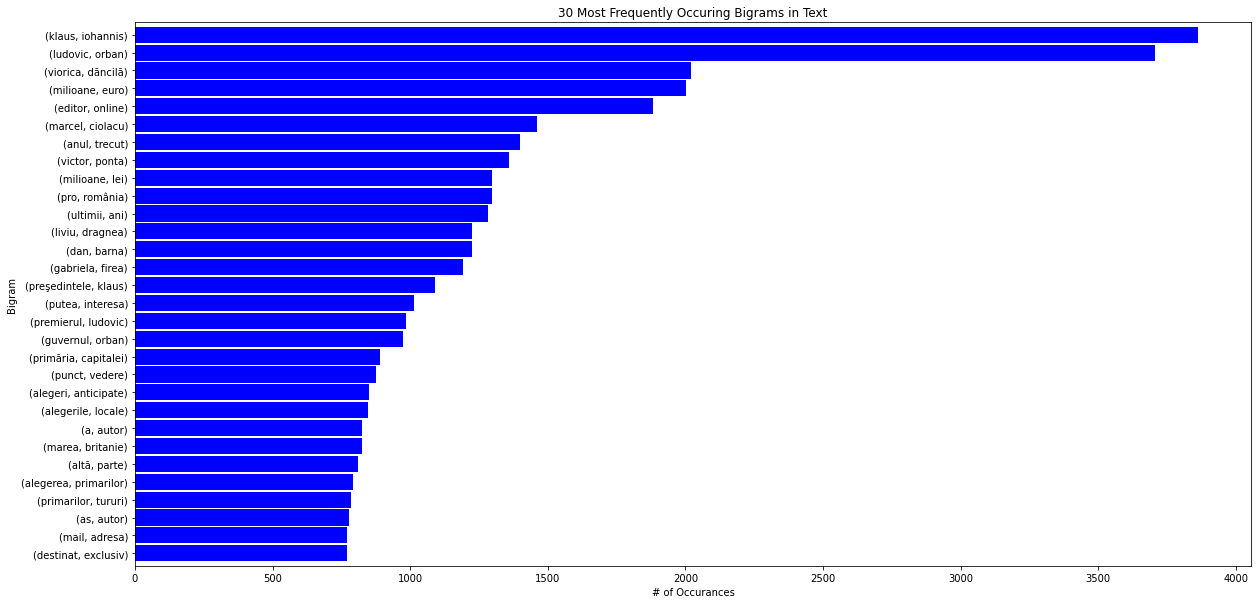

In [10]:
top_30_bigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 10))
plt.title('30 Most Frequently Occuring Bigrams in Text')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

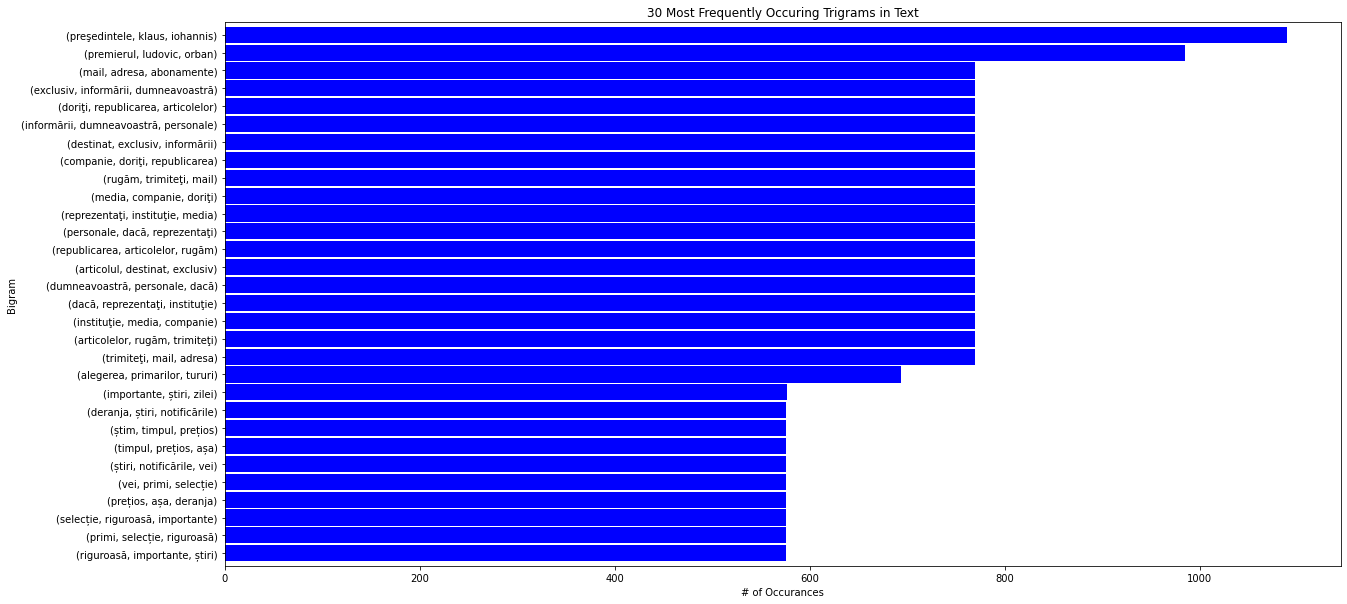

In [11]:
top_30_trigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 10))
plt.title('30 Most Frequently Occuring Trigrams in Text')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

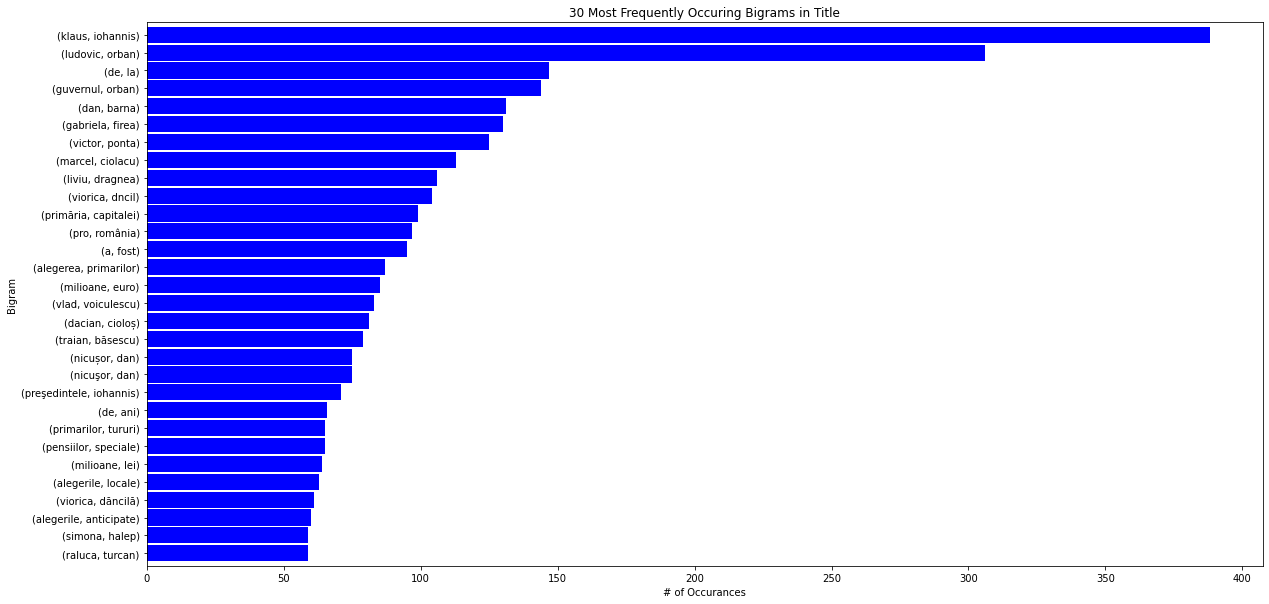

In [13]:
flatten_list = []
for sublist in df["title_clean"].to_list():
    flatten_list.extend(sublist)

top_30_bigram_series = (pd.Series(nltk.ngrams(flatten_list, 2)).value_counts())[:30]
top_30_trigram_series = (pd.Series(nltk.ngrams(flatten_list, 3)).value_counts())[:30]

top_30_bigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 10))
plt.title('30 Most Frequently Occuring Bigrams in Title')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

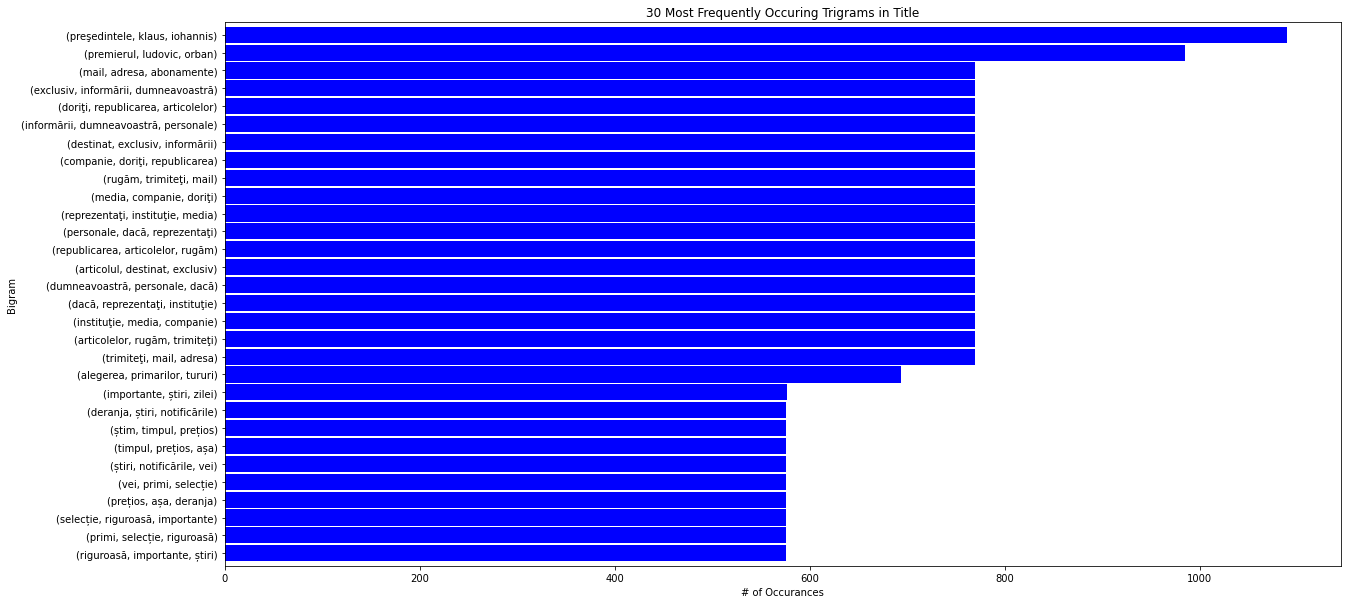

In [12]:
top_30_trigram_series.sort_values().plot.barh(color='blue', width=.9, figsize=(20, 10))
plt.title('30 Most Frequently Occuring Trigrams in Title')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()